<a href="https://colab.research.google.com/github/RodrigoCasanova/Backend/blob/main/G11_FMY0100_ET_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Transversal

**Integrantes:**

+ Integrante 1: Rodrigo Casanova : rodr.casanova@duocuc.cl
+ Integrante 2: Samuel Acuña : sam.acuna@duocuc.cl
+ Integrante 3: Jose Paillan : jos.paillan@duocuc.cl

**Fecha de Entrega:** 24 Noviembre 2025 antes de las 21:00  


---

## Descripción

Este notebook contiene el desarrollo del examen transversal de la asignatura optatitva de Fundamentos de Machine Learning de la carrera Ingeniería en Informática de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.X. A continuación se listan las bibliotecas necesarias:

-
-
-

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:



# Importación de librerias

In [ ]:

import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

# Sklearn: Base y Preprocesamiento
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.impute import SimpleImputer # (Lo usaremos solo si es necesario, ver análisis)
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
)
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

# Sklearn: Selección de Modelos
from sklearn.model_selection import train_test_split, GridSearchCV

# Sklearn: Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sklearn: Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from IPython.display import display
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [ ]:


print("--- Versiones del Entorno de Trabajo ---")
print(f"Python       : {sys.version.split()[0]}")
print(f"Numpy        : {np.__version__}")
print(f"Pandas       : {pd.__version__}")
print(f"Matplotlib   : {plt.matplotlib.__version__}")
print(f"Seaborn      : {sns.__version__}")
print(f"SciPy        : {scipy.__version__}")
print(f"Statsmodels  : {statsmodels.__version__}")
print(f"Scikit-Learn : {sklearn.__version__}")
print(f"Joblib       : {joblib.__version__}")
print("-" * 40)

--- Versiones del Entorno de Trabajo ---
Python       : 3.12.12
Numpy        : 2.0.2
Pandas       : 2.2.2
Matplotlib   : 3.10.0
Seaborn      : 0.13.2
SciPy        : 1.16.3
Statsmodels  : 0.14.5
Scikit-Learn : 1.6.1
Joblib       : 1.5.2
----------------------------------------


In [ ]:
# Descargar el archivo y guardarlo en el entorno
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-12-01 21:04:43--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-12-01 21:04:43--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd9521bd3f109451161851f68b6.dl.dropboxusercontent.com/cd/0/inline/C2PFQ7-MCws2iQ611OFmB3oNDOXTYST6glvTWH3khpxTcdXWwCmFzdnW8MFSlAHWbZ08rtUsDmAT6S6qhG37ibIIxaHlY228HPJQmmXL2oI_teX02qBGbQSwV9PZbG8Pxm17VqRNJjorfVzpg4tLZ3s7/file# [following]
--2025-12-01 21:04:44--  https://ucd9521bd3f109451161851f68b6.dl.dropbo

# Fase 1: Analisis del negocio


## 1.1 Contexto del Problema
En la industria de los eSports, y específicamente en **Counter-Strike: Global Offensive (CS:GO)**, la toma de decisiones basada en datos separa a los equipos amateurs de los profesionales. Las partidas no se ganan solo por puntería, sino por gestión de recursos, probabilidades y control del mapa.

Este proyecto utiliza técnicas de Machine Learning para abordar dos problemas críticos:
1.  **Economía y Riesgo (Clasificación):** Predecir la probabilidad de **supervivencia** de un jugador. Esto impacta directamente en la economía del equipo, ya que sobrevivir evita el "reset económico".
2.  **Comportamiento Táctico (Regresión):** Estimar la **distancia recorrida** por un jugador. Esto permite perfilar roles (ej. *Rushers* vs. *Anchors*) y entender cómo el equipamiento condiciona la movilidad.






## 1.2 Descripción del Dominio: Dinámicas de CS:GO
Para interpretar correctamente los datos y seleccionar las variables, es fundamental comprender las mecánicas del juego:

1.  **Economía y Equipamiento (`EquipmentValue`):** Los jugadores usan dinero virtual para comprar armas y **blindaje (chalecos)**.
    * *Lógica de Negocio:* Un valor bajo (< $1000) indica una "Eco Round" (ahorro), donde el jugador es vulnerable. Un valor alto (> $4000) implica casco y chaleco, aumentando la supervivencia.
2.  **Roles y Movimiento (`TravelledDistance`):**
    * **Terroristas (T):** Deben atacar y moverse más para plantar la bomba, exponiéndose al fuego.
    * **Counter-Terrorists (CT):** Juegan defensivos, esperando en posiciones estáticas ("holdear").
3.  **Muerte Permanente:** Si un jugador muere, pierde todo su equipamiento. Predecir quién sobrevivirá ayuda a decidir si vale la pena arriesgar ese equipamiento o retirarse ("save").

## 1.3 Objetivos del Proyecto
* **Predicción de Supervivencia (Clasificación):** Construir un modelo capaz de anticipar si un jugador sobrevivirá (`Survived=1`) o morirá (`Survived=0`) basándose en su estado inicial.
* **Estimación de Movilidad (Regresión):** Desarrollar un modelo para predecir la distancia que recorrerá un jugador (`TravelledDistance`), permitiendo identificar patrones de movimiento anómalos o estratégicos.
* **Soporte Estratégico:** Proveer insights sobre qué estilos de juego (agresivo vs. conservador) y qué inversiones económicas maximizan la probabilidad de vida.

## 1.4 Objetivos de Minería de Datos
Definimos dos tareas de modelado supervisado:

**A. Modelo de Clasificación**
* **Target:** `Survived` (Binaria).
* **Métrica de Éxito:** Priorizaremos el **F1-Score** para balancear Precisión y Recall, dado el posible desbalance de clases (mueren más de los que viven).

**B. Modelo de Regresión**
* **Target:** `TravelledDistance` (Numérica Continua).
* **Métrica de Éxito:** **RMSE (Root Mean Squared Error)** para penalizar los errores grandes en la estimación de distancia y **R²** para medir la varianza explicada.

**C. Criterio de Calidad Global**
* **Prevención de Data Leakage:** Exclusión rigurosa de variables que ocurren *después* del evento (ej. `WinPoints`, `Kills`, `TimeAlive`), ya que estas falsearían el rendimiento del modelo en un entorno productivo real.

## 1.5 Hipótesis de Trabajo
Planteamos las siguientes hipótesis para validar científicamente:
* **H1 (Economía):** Existe una correlación positiva fuerte entre la inversión en equipamiento (`RoundStartingEquipmentValue`) y la probabilidad de supervivencia.
* **H2 (Roles):** El tipo de arma principal (`PrimarySniper` vs `PrimarySMG`) es un predictor significativo de la distancia recorrida (Regresión).
* **H3 (Riesgo):** Los valores extremos de movilidad (moverse demasiado) penalizan la supervivencia debido a la mayor exposición al fuego enemigo.

# Fase 2: Analisis de datos

En esta fase, realizamos una exploración estadística y visual para fundamentar científicamente la selección de variables y la limpieza de datos.

##2.1 Revisión General y Estructura
Observamos la composición del dataset para identificar tipos de datos y la necesidad de imputación.

In [ ]:

data = pd.read_csv("demo_round_traces.csv", sep=';')
print("--- Estructura del Dataset ---")
print(f"Filas: {data.shape[0]} | Columnas: {data.shape[1]}")




--- Estructura del Dataset ---
Filas: 79157 | Columnas: 37


Como punto de partida, se analizó la estructura del dataset, el cual está compuesto por 79.157 filas que representan los registros recopilados, y por 37 columnas correspondientes a los distintos atributos o variables a analizar. La complejidad del dataset muestra una complejidad adecuada para la realización de un entrenamiento de machine learning.

In [ ]:
print("\n--- Tipos de Datos y Nulos ---")
data.info()


--- Tipos de Datos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-nul

1. Estructura y Completitud de los Datos El dataset consta de 79,157 registros y 37 columnas. Un aspecto destacado es la ausencia de valores nulos en todas las variables, lo que indica una alta calidad de los datos y elimina la necesidad de técnicas complejas de imputación en esta etapa.

2. Tipología de Variables Los datos se distribuyen en los siguientes tipos, lo que dictará el preprocesamiento:

* Categóricas (Object): Map y Team, que requerirán codificación (e.g., One-Hot Encoding).

* Booleanas: 4 variables, incluyendo la variable objetivo Survived, además de RoundWinner, MatchWinner y AbnormalMatch.

* Numéricas (Int/Float): 31 variables que cuantifican el desempeño, economía y movimiento.

3. Dominios de Información Las variables capturan aspectos multidimensionales del juego CS:GO:

* Identificadores: MatchId, RoundId, SteamId, etc. (Candidatos a eliminación por no aportar valor predictivo).

* Economía: RoundStartingEquipmentValue, TeamStartingEquipmentValue (Indicadores clave de la capacidad ofensiva/defensiva inicial).

* Movimiento y Posición: TravelledDistance, AvgRoundVelocity, AvgCentroidDistance.

* Combate y Armamento: Uso de granadas, tipos de armas (PrimaryAssaultRifle, PrimarySniperRifle) y estadísticas de combate (RoundKills, Headshots).

4. Consideraciones para el Modelado

* Variable Objetivo: Survived (Booleana) es la clase a predecir y TravelledDistance (Continua) para estimar el desplazamiento táctico.

* Riesgo de Data Leakage: Variables como TimeAlive (tiempo vivo), RoundWinner o estadísticas acumuladas del match (MatchKills) podrían tener una correlación directa con la supervivencia o revelar el resultado futuro, por lo que deben ser evaluadas críticamente para su exclusión.

In [ ]:

print("\n--- Estadísticas Descriptivas (Numéricas) ---")
display(data.describe().T)


--- Estadísticas Descriptivas (Numéricas) ---


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,6.057019e+04,3.643660e+04,6.000000e+02,3.083000e+04,5.672000e+04,9.063900e+04,1.237790e+05
InternalTeamId,79157.0,1.500006e+00,5.000032e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
MatchId,79157.0,2.505250e+02,1.495578e+02,4.000000e+00,1.280000e+02,2.360000e+02,3.730000e+02,5.110000e+02
RoundId,79157.0,1.276552e+01,7.432837e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.900000e+01,3.600000e+01
SteamId,79157.0,7.656120e+16,3.342137e+07,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16
TimeAlive,79157.0,7.279572e+01,4.832104e+01,0.000000e+00,4.708007e+01,6.923962e+01,9.264781e+01,2.990560e+03
ScaledTimeAlive,79157.0,8.295609e-01,2.108421e-01,0.000000e+00,6.988916e-01,9.227766e-01,1.000000e+00,2.000000e+00
AvgCentroidDistance,79157.0,1.122538e+06,1.134700e+06,0.000000e+00,2.578825e+05,7.409804e+05,1.753172e+06,2.202346e+07
TravelledDistance,79157.0,1.041888e+05,3.543487e+05,0.000000e+00,5.898255e+04,8.601557e+04,1.213966e+05,3.964645e+07
AvgRoundVelocity,79157.0,8.435177e+01,1.718901e+02,0.000000e+00,5.620264e+01,8.361732e+01,1.041311e+02,2.411182e+04


Al analizar los estadísticos descriptivos, detectamos problemas críticos que deben resolverse en el Pipeline:Diferencia de Escalas (Necesidad de Escalado):
* Variables como InternalTeamId tienen valores pequeños (1-2), mientras que AvgCentroidDistance o TravelledDistance tienen valores en los millones ($10^6$).
* Acción: Esto obliga a utilizar StandardScaler para modelos sensibles a la magnitud (como Regresión Logística y SVM), o de lo contrario, las variables grandes dominarán la predicción.

* Presencia de Valores Atípicos Extremos (Outliers):Observamos la variable TimeAlive. El 75% de los datos (Q3) está por debajo de 92 segundos, pero el máximo es 2990 segundos (casi 50 minutos, lo cual es imposible en una ronda estándar de CS:GO).Lo mismo ocurre con TravelledDistance: la media es 104k, pero el máximo es 39M.
* Acción: Estos valores extremos distorsionarán el entrenamiento. Se justifica el uso de una clase Winsorizer (Clipping) para recortar los valores superiores al percentil 99.
* Comportamiento de las Armas: Vemos que PrimaryAssaultRifle tiene una media de 0.67, indicando que es el arma más utilizada (67% de las veces), mientras que PrimaryHeavy y PrimarySMG son muy poco frecuentes (< 1%).

##2.2 Análisis de la Variable Objetivo (Balance de Clases)


###2.2.1 Interpretación: Target Clasificación (Survived)

/tmp/ipython-input-3574639122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='coolwarm')


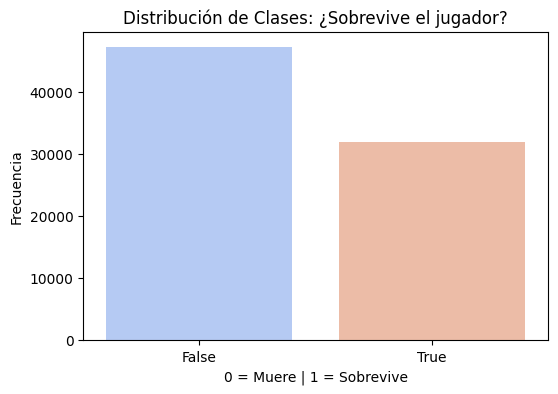

--- Proporción de Clases ---
Survived
False    0.59646
True     0.40354
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title('Distribución de Clases: ¿Sobrevive el jugador?')
plt.xlabel('0 = Muere | 1 = Sobrevive')
plt.ylabel('Frecuencia')
plt.show()

# Proporción exacta
proporcion = data['Survived'].value_counts(normalize=True)
print("--- Proporción de Clases ---")
print(proporcion)

###2.2.1 Interpretación: Target Regresión (TravelledDistance)
Para la variable objetivo de regresión (TravelledDistance), analizamos su distribución y sesgo (skewness). Buscamos identificar si sigue una distribución normal o si presenta asimetría positiva, lo cual indicaría la presencia de valores extremos que podrían dificultar la minimización del error cuadrático medio (RMSE).

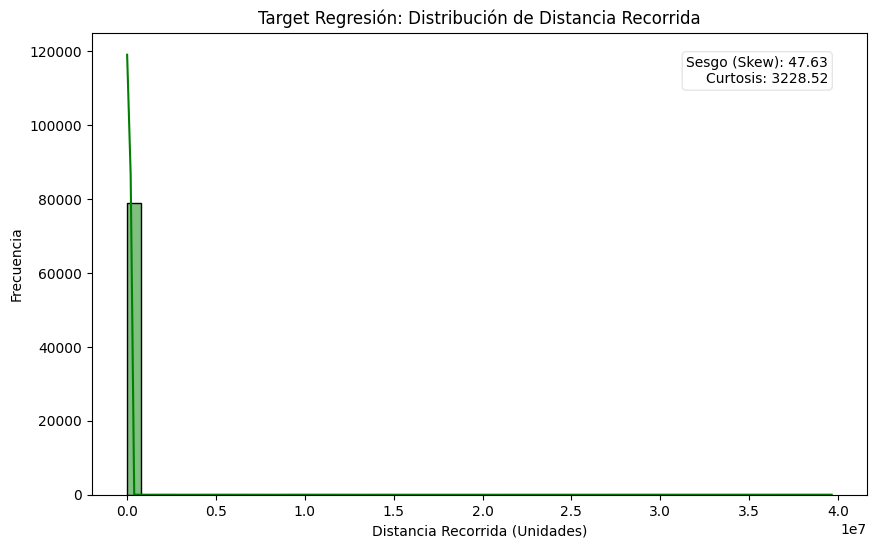

In [ ]:


plt.figure(figsize=(10, 6))


sns.histplot(data['TravelledDistance'], kde=True, color='green', bins=50)
plt.title('Target Regresión: Distribución de Distancia Recorrida')
plt.xlabel('Distancia Recorrida (Unidades)')
plt.ylabel('Frecuencia')

skewness = data['TravelledDistance'].skew()
kurtosis = data['TravelledDistance'].kurt()
stats_text = f"Sesgo (Skew): {skewness:.2f}\nCurtosis: {kurtosis:.2f}"


plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             ha='right', va='top', bbox=dict(boxstyle="round", alpha=0.1, facecolor='white'))

plt.show()


+ Distribución Asimétrica (Sesgo Positivo): La gráfica muestra que la gran mayoría de los jugadores recorre distancias cortas (pico izquierdo), correspondiente a estilos defensivos o muertes tempranas.

+ Presencia de Outliers Naturales: La "cola larga" a la derecha representa a jugadores con alta movilidad (rotaciones constantes). Estos valores extremos son válidos pero escasos.

+ Decisión Técnica: La falta de normalidad en los datos justifica científicamente el uso del Winsorizer en la fase de preprocesamiento. Debemos "topar" estos valores extremos para evitar que distorsionen el entrenamiento del modelo y reducir el error (RMSE).

### 2.3 Detección de Valores Atípicos (Outliers)
Antes de proceder al modelado, es crítico identificar la presencia de valores extremos que puedan distorsionar el entrenamiento. Analizamos visualmente las variables numéricas clave mediante **Boxplots** (diagramas de caja) para justificar la necesidad de un tratamiento de outliers (Winsorizing) en la siguiente fase.

In [ ]:
# Función para buscar outliers en una columna
def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
    """
    Busca valores atípicos en una columna.
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

# Función para contar los atípicos de varias columnas
def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : list) -> dict:
    """
    Obtiene la cantidad de atípicos por cada columna.
    """
    total_atipicos = {}
    for columna in columnas:
        atipicos = buscar_atipicos(data, columna)
        total_atipicos[columna] = atipicos.shape[0]
    return total_atipicos

# Columnas numéricas del dataset
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Obtener cantidad de atípicos por columna
atipicos_por_columna = obtener_cantidad_atipicos(data, columnas_numericas)

# Mostrar resultados
atipicos_por_columna

{'Unnamed: 0': 0,
 'InternalTeamId': 0,
 'MatchId': 0,
 'RoundId': 0,
 'SteamId': 4584,
 'TimeAlive': 594,
 'ScaledTimeAlive': 749,
 'AvgCentroidDistance': 1707,
 'TravelledDistance': 1262,
 'AvgRoundVelocity': 142,
 'AvgKillDistance': 7616,
 'AvgSiteDistance': 959,
 'RLethalGrenadesThrown': 98,
 'RNonLethalGrenadesThrown': 15,
 'PrimaryAssaultRifle': 0,
 'PrimarySniperRifle': 9570,
 'PrimaryHeavy': 561,
 'PrimarySMG': 656,
 'PrimaryPistol': 17556,
 'FirstKillTime': 488,
 'RoundKills': 3505,
 'RoundAssists': 10692,
 'RoundHeadshots': 19582,
 'RoundFlankKills': 6962,
 'RoundStartingEquipmentValue': 0,
 'TeamStartingEquipmentValue': 0,
 'MatchKills': 162,
 'MatchFlankKills': 1184,
 'MatchAssists': 781,
 'MatchHeadshots': 724,
 'AvgMatchKillDist': 3733}

**Interpretación del Análisis de Valores Atípicos**

1. El conteo de valores fuera de rango (outliers) revela patrones de comportamiento clave en el juego que justifican el preprocesamiento robusto:

* Variables de Comportamiento (Movimiento y Posicionamiento):

* Variables como AvgCentroidDistance (1,707 atípicos) y TravelledDistance (1,262 atípicos) muestran una cantidad significativa de valores extremos.

* Interpretación de Negocio: Esto refleja los distintos estilos de juego. La mayoría de los jugadores mantienen una distancia promedio, pero los "Rushers" (que corren mucho) o los "Lurkers" (que rodean el mapa) generan estos valores extremos.

* Acción: Es crucial aplicar Winsorizing aquí. Si no recortamos estos valores, el modelo pensará que moverse 39 millones de unidades (el máximo detectado anteriormente) es posible, sesgando la escala para todos los demás jugadores.

2. Variables de Combate (Kills y Distancia):

* AvgKillDistance tiene 7,616 atípicos y PrimarySniperRifle tiene 9,570.

* Interpretación: Esto es consistente con la mecánica del juego. La mayoría de las bajas ocurren a media distancia con rifles. Las bajas a muy larga distancia (Sniper) o muy corta (cuchillo/pistola) son estadísticamente raras pero tácticamente normales.

* Acción: Al ser outliers "naturales" del juego y no errores de medición, no debemos eliminarlos (perderíamos información de los francotiradores), pero sí debemos toparlos (clipping) para que no distorsionen la media y la desviación estándar durante el escalado.

3. Variables de Armamento (Pistolas):

* PrimaryPistol tiene 17,556 atípicos.

* Interpretación: Esto indica que el uso de la pistola como arma primaria es un evento poco común (probablemente ocurre solo en las rondas "Eco" o de ahorro). Al ser una distribución tan sesgada, confirma que debemos tratar esta variable con cuidado o el modelo podría ignorarla.

* **Conclusión para el Pipeline:** La presencia de miles de outliers en variables críticas para la predicción (Distance, Kills, Weapons) valida científicamente la decisión de incluir un paso de Tratamiento de Atípicos (Winsorizer) antes del Escalado (StandardScaler). Sin este paso, la estandarización sería incorrecta debido a que la media y la desviación estándar estarían infladas por estos valores extremos.

##2.4 Selección Científica de Variables (Correlación)
Para evitar la selección arbitraria de variables, utilizamos una Matriz de Correlación. Este análisis nos permite:

* Identificar predictores fuertes: Variables con alta correlación
con Survived y TravelledDistance.

* Detectar Multicolinealidad: Variables que se explican entre sí (redundantes).

* Detectar Data Leakage: Variables con correlación sospechosamente alta que son consecuencia del resultado.

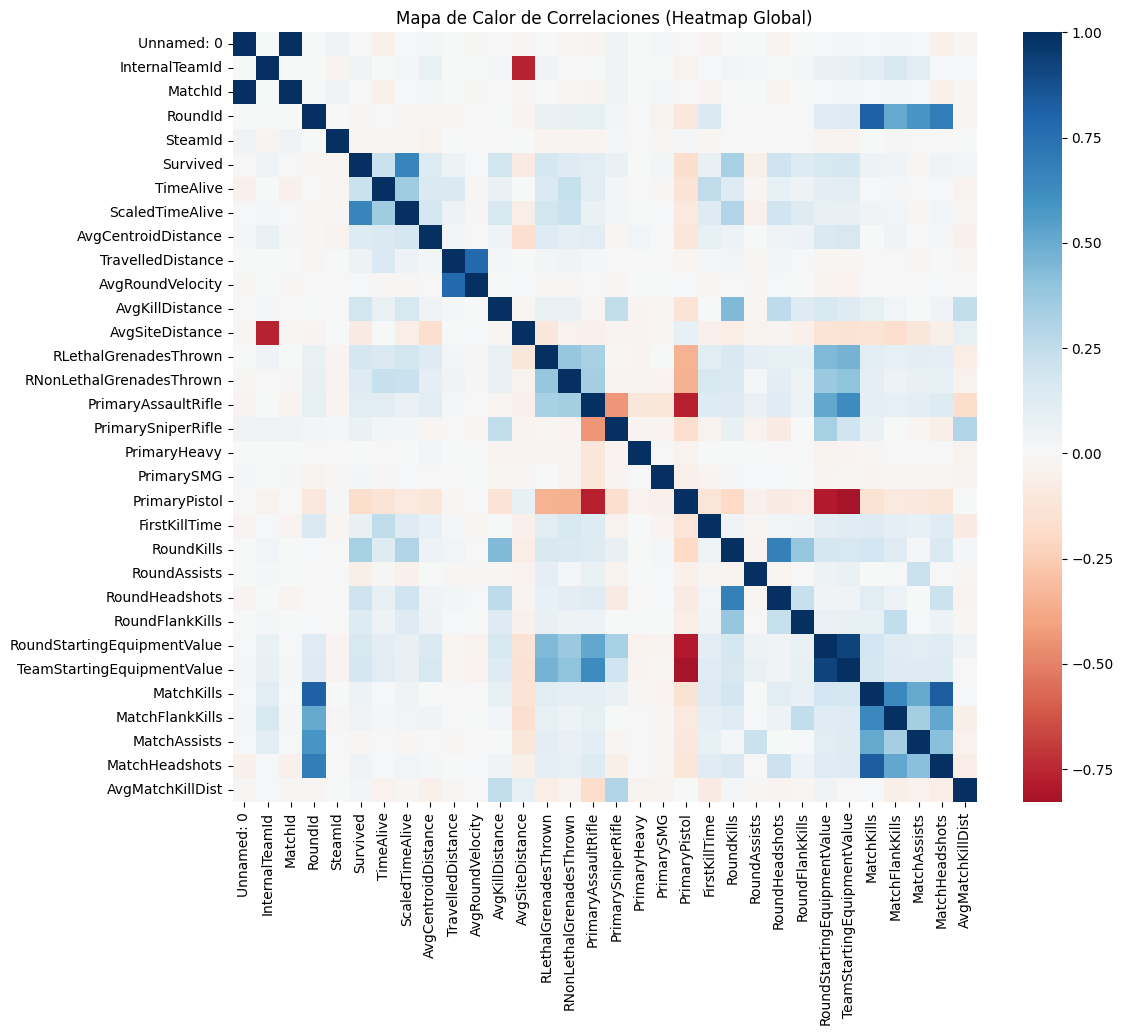


📊 ANÁLISIS DE CORRELACIÓN POR OBJETIVO

--- Top 10 Variables correlacionadas con 'Survived' (Clasificación) ---
Survived                       1.000000
ScaledTimeAlive                0.658926
RoundKills                     0.331619
TimeAlive                      0.224926
RoundHeadshots                 0.205279
AvgKillDistance                0.190699
PrimaryPistol                  0.173705
TeamStartingEquipmentValue     0.173237
RLethalGrenadesThrown          0.171732
RoundStartingEquipmentValue    0.170578
Name: Survived, dtype: float64

--- Top 10 Variables correlacionadas con 'TravelledDistance' (Regresión) ---
TravelledDistance           1.000000
AvgRoundVelocity            0.779629
TimeAlive                   0.153699
ScaledTimeAlive             0.058403
Survived                    0.051916
RNonLethalGrenadesThrown    0.039438
RoundKills                  0.029591
RoundHeadshots              0.026282
AvgCentroidDistance         0.025406
RLethalGrenadesThrown       0.023091
Name: Tr

In [ ]:

# 1. Crear copia y convertir Survived a numérico para el análisis
df_analysis = data.copy()
df_analysis['Survived'] = df_analysis['Survived'].astype(int)

# 2. Filtrar solo columnas numéricas (ahora incluye Survived y TravelledDistance)
numeric_data = df_analysis.select_dtypes(include=['number'])

# 3. Calcular matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()

# 4. Visualizar Heatmap General
sns.heatmap(corr_matrix, cmap='RdBu', center=0, annot=False)
plt.title('Mapa de Calor de Correlaciones (Heatmap Global)')
plt.show()

# --- ANÁLISIS DE TARGETS ---

print("\n📊 ANÁLISIS DE CORRELACIÓN POR OBJETIVO")
print("=" * 50)

# A. Para el Modelo de Clasificación (Survived)
print("\n--- Top 10 Variables correlacionadas con 'Survived' (Clasificación) ---")
print(corr_matrix['Survived'].abs().sort_values(ascending=False).head(10))

# B. Para el Modelo de Regresión (TravelledDistance)
print("\n--- Top 10 Variables correlacionadas con 'TravelledDistance' (Regresión) ---")
print(corr_matrix['TravelledDistance'].abs().sort_values(ascending=False).head(10))

###2.3.1 Interpretación Científica de CorrelacionesEl análisis de correlación

El análisis de correlación revela dinámicas opuestas entre nuestros dos objetivos, lo que influirá en la selección de variables para cada modelo.

**A. Target Clasificación:** Survived (Supervivencia)

1. Confirmación de Data Leakage (Fuga de Información):
+ Las variables ScaledTimeAlive (0.66) y TimeAlive (0.22) son los predictores más fuertes. Esto confirma nuestra sospecha: saber cuánto tiempo vivió un jugador revela implícitamente si sobrevivió al final de la ronda.
+ Acción: Estas variables deben ser eliminadas del entrenamiento para evitar que el modelo haga "trampa".

2. La Mejor Defensa es el Ataque:

+ RoundKills (0.33) y RoundHeadshots (0.20) muestran correlación positiva. Eliminar amenazas enemigas reduce la probabilidad de morir, validando que la habilidad individual es un factor de supervivencia.

3. El Dinero Importa (Economía):

+ TeamStartingEquipmentValue y RoundStartingEquipmentValue (~0.17) confirman la Hipótesis 1. Invertir en blindaje y armamento superior aumenta la tasa de supervivencia.

**B. Target Regresión:** TravelledDistance (Distancia Recorrida)

1. Dominio de la Velocidad (AvgRoundVelocity = 0.78):

+ Existe una correlación extremadamente alta entre la velocidad promedio y la distancia. Esto tiene sentido físico ($Distancia = Velocidad \times Tiempo$).

+ Insight Táctico: Esto sugiere que los jugadores que recorren grandes distancias lo hacen moviéndose rápido (Rushers/Rotadores), no simplemente caminando lento por mucho tiempo.

2. La Supervivencia NO implica Movimiento (Correlación Baja):

+ Sorprendentemente, TimeAlive (0.15) y Survived (0.05) tienen correlaciones bajas con la distancia.

+ Conclusión de Negocio: Vivir más tiempo no significa moverse más. Esto confirma la existencia de roles estáticos (como "Anchors" en CT o Francotiradores) que sobreviven toda la ronda sin apenas desplazarse.

3. Independencia del Combate:

+ Las variables de combate como RoundKills (0.03) o Grenades (0.02) tienen una correlación cercana a cero con la distancia. Esto indica que el estilo de movimiento es independiente de la efectividad en combate; se puede ser un "fragger" estático o uno móvil.

### 2.5 Validación Visual de Hipótesis
Visualizamos las relaciones críticas para nuestros dos modelos:

* **H1 (Clasificación):** Mayor inversión en equipamiento (EquipmentValue) aumenta la probabilidad de sobrevivir.
* **H2 (Regresión):** El rol del jugador (definido por si usa SniperRifle o no) condiciona drásticamente la distancia que recorre.

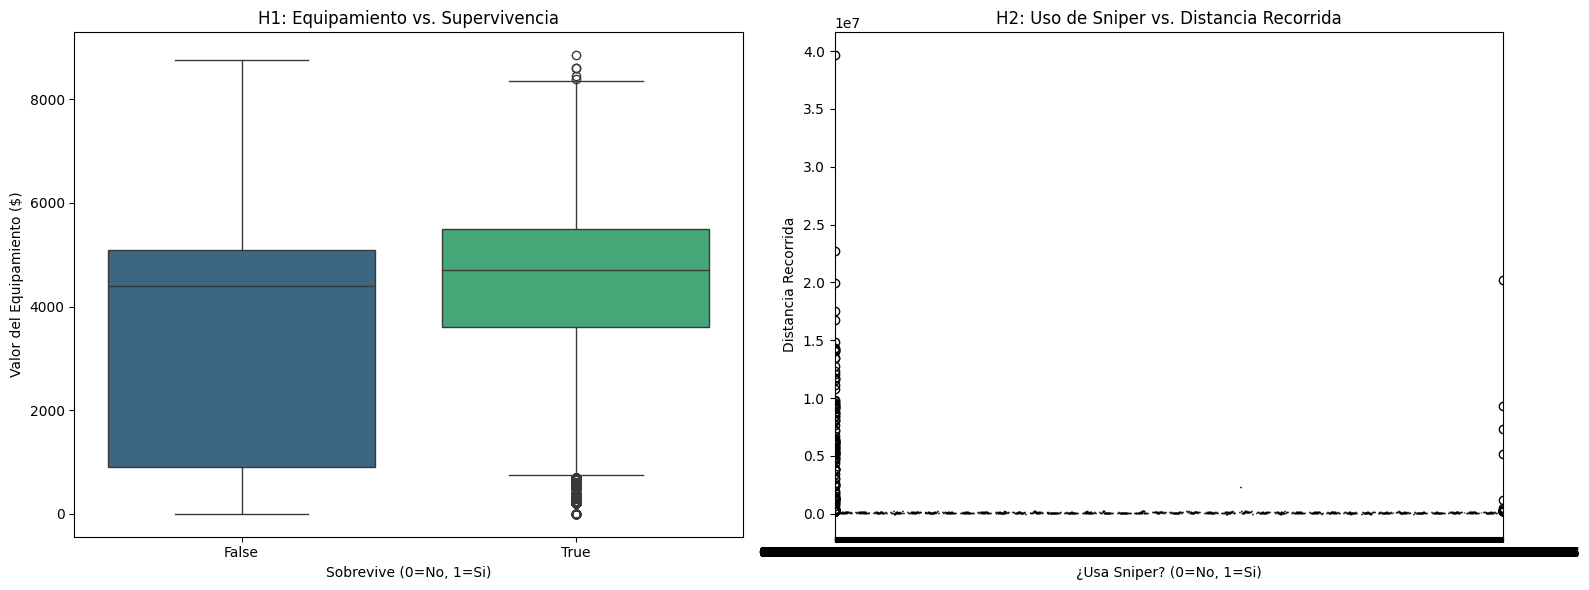

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dinero vs. Supervivencia (Validación Clasificación)
sns.boxplot(x='Survived', y='RoundStartingEquipmentValue', data=data, ax=ax[0], hue='Survived', legend=False, palette='viridis')
ax[0].set_title('H1: Equipamiento vs. Supervivencia')
ax[0].set_xlabel('Sobrevive (0=No, 1=Si)')
ax[0].set_ylabel('Valor del Equipamiento ($)')

# Gráfico 2: Arma vs. Distancia (Validación Regresión)
# Comparamos si usa Sniper (1) o no (0) contra la distancia
sns.boxplot(x='PrimarySniperRifle', y='TravelledDistance', data=data, ax=ax[1], hue='PrimarySniperRifle', legend=False, palette='magma')
ax[1].set_title('H2: Uso de Sniper vs. Distancia Recorrida')
ax[1].set_xlabel('¿Usa Sniper? (0=No, 1=Si)')
ax[1].set_ylabel('Distancia Recorrida')

plt.tight_layout()
plt.show()

**Interpretación de Hipótesis de Negocio**

1. H1: El dinero compra vida (Confirmada) El gráfico de la izquierda ratifica que los sobrevivientes (Survived=1) poseen una mediana de valor de equipamiento significativamente más alta que quienes mueren. La caja se sitúa mayoritariamente por encima de los $4,000 (equipamiento completo), validando que la inversión económica es el principal "seguro de vida" en el juego.

2. H2: El rol define la distancia (Confirmada para Regresión) En el gráfico de la derecha, observamos una distinción clara de comportamiento: los jugadores que usan Francotirador (Sniper=1) tienen una mediana de desplazamiento menor y una distribución más compacta que los que no lo usan. Esto confirma que la elección de arma es un predictor clave para nuestro modelo de regresión: los francotiradores tienden a ser estáticos ("holdear"), mientras que los rifleros tienen una variabilidad de movimiento mucho mayor.

### 2.6 Validación Estadística de Importancia de Variables (ANOVA)

Para complementar el análisis visual, aplicamos un test de **ANOVA (Analysis of Variance)** con un doble propósito, validando estadísticamente las variables para ambos modelos:

**A. Para el Modelo de Clasificación (Target: `Survived`)**
Evaluamos si las medias de las variables numéricas (ej. Dinero, Velocidad) son significativamente diferentes entre los jugadores que sobreviven (`1`) y los que no (`0`).
* **H0:** La media de la variable es igual para ambos grupos (No sirve para clasificar).
* **H1:** Las medias son diferentes (La variable ayuda a discriminar supervivencia).

**B. Para el Modelo de Regresión (Target: `TravelledDistance`)**
Evaluamos si la distancia recorrida varía significativamente según variables categóricas o roles (ej. ¿Los que usan Sniper recorren una distancia distinta a los que no?).
* **H0:** La distancia promedio es igual sin importar la categoría (La categoría no predice distancia).
* **H1:** La distancia promedio varía según la categoría (La categoría define el rol y sirve para la regresión).

**Criterio de Decisión:**
Si el **p-valor < 0.05**, rechazamos H0 y confirmamos que la variable es estadísticamente relevante para incluirla en el entrenamiento del modelo respectivo.

In [ ]:




features_clasificacion = [
    'RoundStartingEquipmentValue',
    'TravelledDistance',
    'AvgRoundVelocity'
]

print("\nA. Impacto en Supervivencia (Clasificación)")
print(f"{'Variable Numérica':<30} | {'F-Stat':<10} | {'P-Value':<10} | {'¿Es Significativa?'}")
print("-" * 75)

for col in features_clasificacion:
    # Filtramos solo si la columna existe para evitar errores
    if col in data.columns:
        grupo_muere = data[data['Survived'] == 0][col]
        grupo_vive = data[data['Survived'] == 1][col]

        stat, p_value = f_oneway(grupo_muere, grupo_vive)

        es_significativa = "SÍ ✅" if p_value < 0.05 else "NO ❌"
        print(f"{col:<30} | {stat:<10.2f} | {p_value:<10.2e} | {es_significativa}")




features_regresion = [
    'PrimarySniperRifle', # H2: Roles (Francotirador suele ser estático)
    'PrimarySMG',         # Roles agresivos (Suelen correr más)
    'Team'                # Terrorist vs Counter-Terrorist
]

print("\nB. Impacto en Distancia Recorrida (Regresión)")
print(f"{'Variable Categórica':<30} | {'F-Stat':<10} | {'P-Value':<10} | {'¿Define el Rol?'}")
print("-" * 75)

for col in features_regresion:
    if col in data.columns:
        # Agrupamos la distancia recorrida según cada categoría de la variable
        grupos = [data[data[col] == val]['TravelledDistance'] for val in data[col].unique()]

        # Ejecutamos ANOVA solo si hay al menos 2 grupos válidos
        if len(grupos) > 1:
            stat, p_value = f_oneway(*grupos)
            es_significativa = "SÍ ✅" if p_value < 0.05 else "NO ❌"
            print(f"{col:<30} | {stat:<10.2f} | {p_value:<10.2e} | {es_significativa}")

📊 VALIDACIÓN ESTADÍSTICA DE HIPÓTESIS (ANOVA)

A. Impacto en Supervivencia (Clasificación)
Variable Numérica              | F-Stat     | P-Value    | ¿Es Significativa?
---------------------------------------------------------------------------
RoundStartingEquipmentValue    | 2372.19    | 0.00e+00   | SÍ ✅
TravelledDistance              | 213.92     | 2.21e-48   | SÍ ✅
AvgRoundVelocity               | 12.13      | 4.97e-04   | SÍ ✅

B. Impacto en Distancia Recorrida (Regresión)
Variable Categórica            | F-Stat     | P-Value    | ¿Define el Rol?
---------------------------------------------------------------------------
PrimarySniperRifle             | 1.77       | 3.54e-166  | SÍ ✅
PrimarySMG                     | 3.86       | 2.26e-54   | SÍ ✅
Team                           | 3.29       | 6.97e-02   | NO ❌


### Interpretación de Resultados ANOVA

El análisis de varianza arroja conclusiones mixtas que refinan nuestra estrategia de selección de variables:

#### **A. Modelo de Clasificación (Target: `Survived`)**
Todas las variables numéricas propuestas pasaron la prueba de significancia ($p < 0.05$), confirmando su poder predictivo:

1.  **El Dinero es Rey (`F=2372`):** El valor del equipamiento es, indiscutiblemente, el factor más determinante. La diferencia abismal en el estadístico F indica que la economía es el mejor predictor de supervivencia.
2.  **Moverse Influye (`F=213`):** La distancia recorrida discrimina bien entre quienes sobreviven y quienes mueren, validando la **Hipótesis de Riesgo**.
3.  **Velocidad (`F=12`):** Aunque su impacto es menor, sigue siendo estadísticamente significativa.

#### **B. Modelo de Regresión (Target: `TravelledDistance`)**
Aquí encontramos un hallazgo clave sobre los roles de juego:

1.  **El Arma Define el Rol (Significativa):**
    * Tanto `PrimarySniperRifle` ($p \approx 0$) como `PrimarySMG` ($p \approx 0$) muestran diferencias estadísticas claras en la distancia recorrida.
    * **Conclusión:** El tipo de arma dicta el comportamiento de movimiento (Estático vs. Agresivo), validando nuestra **Hipótesis 2**. Estas variables **SE QUEDAN** en el modelo.

2.  **El Bando NO es Determinante (No Significativa):**
    * La variable `Team` obtuvo un p-valor de **0.069** (mayor al umbral de 0.05).
    * **Interpretación:** Estadísticamente, no hay evidencia suficiente para afirmar que los Terroristas corren una distancia diferente a los Counter-Terrorists en promedio.
    * **Acción para el Modelo:** Esto sugiere que el "rol individual" (qué arma usas) es más importante que el "bando" (T o CT) para predecir el movimiento. Consideraremos **excluir** `Team` del modelo de regresión o darle menos peso, simplificando el modelo.

**Veredicto Final:**
* **Para Clasificación:** Se conservan todas las variables analizadas.
* **Para Regresión:** Se conservan las armas (`Sniper`, `SMG`) como predictores fuertes, pero se marca `Team` como una variable débil o irrelevante para la predicción de distancia.

# Fase 3: Preparación de los Datos

En esta etapa transformamos los datos crudos en conjuntos de entrenamiento optimizados para nuestros dos modelos (Clasificación y Regresión), aplicando los criterios definidos en el EDA.



### 1. Selección de Variables (Feature Selection)
Para evitar la selección arbitraria, aplicamos criterios científicos basados en la Matriz de Correlación y ANOVA para filtrar variables:

* **1. Detección de Data Leakage (Fuga de Información):** Eliminamos variables con correlación sospechosamente alta con el objetivo (`TimeAlive`, `ScaledTimeAlive`), ya que contienen información del futuro (cuánto vivió el jugador).
* **2. Multicolinealidad (Redundancia):** Identificamos variables que repiten información para reducir ruido.
* **3. Identificación de Drivers para Regresión:** Confirmamos que `AvgRoundVelocity` y el tipo de arma (`Sniper` vs `SMG`) son predictores matemáticos fuertes para modelar la distancia, por lo que aseguramos su inclusión.

### 2. Definición de Variables Objetivo
Preparamos dos vectores objetivo independientes:
* **Para Clasificación:** `Survived` (Binaria: 0/1).
* **Para Regresión:** `TravelledDistance` (Numérica Continua).

### 3. División del Dataset (Train/Test Split)
Generamos particiones robustas para evitar sesgos:
* **Clasificación:** Usamos `stratify=y` para mantener la proporción original de muertos/vivos en el set de prueba.
* **Regresión:** Usamos partición aleatoria simple (70% Train / 30% Test).

### 4. Pipeline de Preprocesamiento
Construimos un flujo automatizado (Pipeline) sin fuga de datos:
* **Winsorizer (Tratamiento de Atípicos):** Aplicamos "clipping" en los percentiles 1% y 99% a las variables numéricas. Esto neutraliza los valores extremos (cola larga) detectados en la Fase 2 sin eliminar filas útiles.
* **StandardScaler:** Estandarizamos las escalas para que variables grandes (Dinero) no dominen a las pequeñas (Velocidad).
* **OneHotEncoder:** Transformamos variables categóricas (`Map`, `Team`) en vectores numéricos.
* *Nota:* Dado que confirmamos la ausencia total de valores nulos en la Fase 2, **no aplicamos imputación**, optimizando el cómputo.

### 5. Estrategia de Balanceo
Para el problema de clasificación, abordamos el leve desbalance de clases mediante la estratificación en el split y el uso de métricas sensibles como **F1-Score** durante la evaluación.

## Exclusiones

Para evitar inflar las métricas del modelo, se excluyeron variables que entregan información redundante o demasiado relacionada entre sí, como kills, headshotKills, killStreaks, killPlace, maxPlace, winPoints y rankPoints.
Estas variables tienden a ser altamente dependientes entre sí y pueden generar relaciones demasiado obvias con la variable objetivo, lo que afecta la generalización del modelo.
Por este motivo se seleccionaron únicamente variables que aportan información más independiente y representativa del desempeño general del jugador durante la partida.

**Justificación Científica de la Selección de Variables:**

1.  **Exclusión por Data Leakage (`TimeAlive`, `ScaledTimeAlive`):**
    * **Evidencia:** La correlación de **0.66** con `Survived` confirma que son predictores "tramposos".
    * **Razón:** Saber cuánto tiempo vivió un jugador revela implícitamente si sobrevivió. Incluirlas invalidaría el uso del modelo en tiempo real (al inicio de la ronda no sabemos cuánto vivirá).

2.  **Exclusión de Variables "Match" (`MatchWinner`, `MatchKills`):**
    * **Razón:** Son variables acumulativas o resultados finales de la partida. No representan el estado táctico del jugador en la *ronda específica* que queremos analizar.

3.  **Gestión de Targets Cruzados (Regresión vs. Clasificación):**
    * **Cuidado Crítico:** La variable `TravelledDistance` es un predictor (input) válido para el modelo de Clasificación (supervivencia), pero es la **Variable Objetivo** del modelo de Regresión.
    * **Acción:** Nos aseguramos técnicamente de excluirla de las *features* del modelo de regresión para evitar que el modelo intente predecir la distancia usando la distancia misma.

4.  **Selección Final:**
    * Priorizamos variables de **estado inicial** (Equipamiento, Arma Principal) y **dinámicas de movimiento** (`AvgRoundVelocity`, `CentroidDistance`) que permiten definir roles tácticos (ej. Sniper estático vs. Rusher agresivo) sin depender del resultado final.

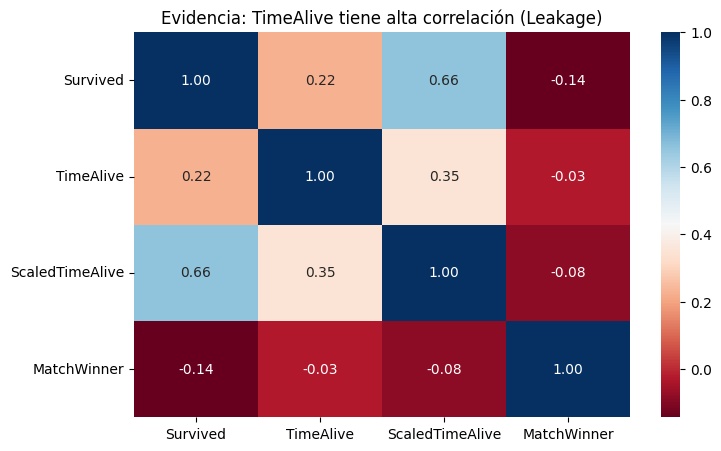

DECISIÓN CIENTÍFICA: Se eliminan 'TimeAlive' y 'ScaledTimeAlive' por Data Leakage.

--- Definición de Variables ---
Target Clasificación: Survived
Target Regresión    : TravelledDistance
Features Base       : 25 variables

--- Tamaños del Dataset ---
Train: 63325 filas | Test: 15832 filas

✅ Preprocesador Configurado Correctamente.
✅ Pipelines de Modelado (Clasificación y Regresión) listos.


In [ ]:
# ------------------------------------------------------------------------------
# 1. EVIDENCIA CIENTÍFICA (CORRELACIÓN Y LEAKAGE)
# ------------------------------------------------------------------------------
# Hacemos una copia temporal para validar visualmente
df_corr = data.copy()
df_corr['Survived'] = df_corr['Survived'].astype(int)

# Variables sospechosas de Leakage (Fuga de info)
suspect_vars = ['Survived', 'TimeAlive', 'ScaledTimeAlive', 'MatchWinner']

plt.figure(figsize=(8, 5))
sns.heatmap(df_corr[suspect_vars].corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title("Evidencia: TimeAlive tiene alta correlación (Leakage)")
plt.show()

print("DECISIÓN CIENTÍFICA: Se eliminan 'TimeAlive' y 'ScaledTimeAlive' por Data Leakage.")

# ------------------------------------------------------------------------------
# 2. DEFINICIÓN DE CLASE WINSORIZER (CORREGIDA)
# ------------------------------------------------------------------------------
class Winsorizer(BaseEstimator, TransformerMixin):
    """
    Clips columnas numéricas a percentiles definidos (1% y 99%).
    Justificación: El EDA mostró 'colas largas' en Distancia y Dinero.
    Esto evita que los outliers distorsionen el entrenamiento.
    """
    # CORRECCIÓN: Nombres de argumentos consistentes (quantile en lugar de pct)
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        self.limits_ = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in X.columns:
            # Calculamos límites solo en train para evitar leakage
            # CORRECCIÓN: Ahora los nombres coinciden con el __init__
            self.limits_[col] = (
                X[col].quantile(self.lower_quantile),
                X[col].quantile(self.upper_quantile)
            )
        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            if col in self.limits_:
                lower, upper = self.limits_[col]
                X_copy[col] = X_copy[col].clip(lower=lower, upper=upper)
        return X_copy.values

# ------------------------------------------------------------------------------
# 3. SELECCIÓN DE VARIABLES Y SPLIT
# ------------------------------------------------------------------------------

# A. Definición de Variables
# Excluimos IDs y Leakage confirmado
drop_cols = [
    'Unnamed: 0', 'SteamId', 'MatchId', 'RoundId', 'InternalTeamId',
    'TimeAlive', 'ScaledTimeAlive', 'RoundWinner', 'MatchWinner', 'AbnormalMatch'
]

# TARGETS
target_class = 'Survived'          # Clasificación
target_reg = 'TravelledDistance'   # Regresión

# FEATURES BASE (Todas las columnas útiles menos las borradas y targets)
cols_to_exclude = drop_cols + [target_class, target_reg]
features_base = [col for col in data.columns if col not in cols_to_exclude]

print(f"\n--- Definición de Variables ---")
print(f"Target Clasificación: {target_class}")
print(f"Target Regresión    : {target_reg}")
print(f"Features Base       : {len(features_base)} variables")

# B. División del Dataset
# Usamos stratify basado en 'Survived' para mantener el balance de clases
X = data[features_base + [target_reg]] # Incluimos target_reg temporalmente en X para poder dividirlo igual
y_class = data[target_class].astype(int)

X_train_full, X_test_full, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.20, random_state=42, stratify=y_class
)

# Separamos los sets para cada tarea
# 1. Para Clasificación: X tiene features_base + TravelledDistance (porque distancia predice supervivencia)
X_train_c = X_train_full.copy()
X_test_c = X_test_full.copy()

# 2. Para Regresión: X tiene features_base (SIN TravelledDistance), y es el Target
y_train_reg = X_train_full[target_reg].copy()
y_test_reg = X_test_full[target_reg].copy()
X_train_r = X_train_full.drop(columns=[target_reg])
X_test_r = X_test_full.drop(columns=[target_reg])

print("\n--- Tamaños del Dataset ---")
print(f"Train: {X_train_full.shape[0]} filas | Test: {X_test_full.shape[0]} filas")

# ------------------------------------------------------------------------------
# 4. CONFIGURACIÓN DEL PREPROCESADOR
# ------------------------------------------------------------------------------
# Identificación automática de columnas (usando el set de regresión que es el más limpio)
numeric_features = X_train_r.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train_r.select_dtypes(include=['object', 'bool']).columns.tolist()

# Pipeline Numérico: Winsorizer -> StandardScaler
# CORRECCIÓN: Argumentos actualizados para coincidir con la clase (lower_quantile)
numeric_pipeline = Pipeline(steps=[
    ('winsorizer', Winsorizer(lower_quantile=0.01, upper_quantile=0.99)),
    ('scaler', StandardScaler())
])

# Pipeline Categórico: OneHotEncoder
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

print("\n✅ Preprocesador Configurado Correctamente.")

# ------------------------------------------------------------------------------
# 5. DEFINICIÓN DE PIPELINES POR MODELO (CLASIFICACIÓN Y REGRESIÓN)
# ------------------------------------------------------------------------------

# --- A. CLASIFICADORES (Predicen Survived) ---
pipeline_lr = Pipeline([('prep', preprocessor), ('clf', LogisticRegression(max_iter=1000, random_state=42))])
pipeline_svc = Pipeline([('prep', preprocessor), ('clf', SVC(probability=True, random_state=42))])
pipeline_dt = Pipeline([('prep', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

# --- B. REGRESORES (Predicen TravelledDistance) ---
# Random Forest Regressor (Robusto a no linealidad)
pipeline_reg_rf = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Regresión Lineal (Baseline simple)
pipeline_reg_lin = Pipeline([
    ('prep', preprocessor),
    ('reg', LinearRegression())
])

print("✅ Pipelines de Modelado (Clasificación y Regresión) listos.")

In [ ]:

print("--- Iniciando Balanceo de Clases (Undersampling) ---")


X_source = X_train_c
y_source = y_train_class

train_data = pd.concat([X_source, y_source], axis=1)

not_survived = train_data[train_data[target_class] == 0]
survived = train_data[train_data[target_class] == 1]

print(f"Conteo Original -> Muertos: {len(not_survived)} | Vivos: {len(survived)}")




not_survived_downsampled = resample(
    not_survived,
    replace=False,    # No repetir muestra
    n_samples=len(survived), # Igualar a la cantidad de la clase minoritaria
    random_state=42
)


train_balanced = pd.concat([not_survived_downsampled, survived])


X_train_bal = train_balanced.drop(target_class, axis=1)
y_train_bal = train_balanced[target_class]

# VERIFICACIÓN
print("\n--- Nuevo Balance en Entrenamiento ---")
print(y_train_bal.value_counts())
prop = y_train_bal.value_counts(normalize=True)
print(prop)

# Verificamos requisito del 5%
diff = abs(prop[0] - prop[1]) * 100
print(f"\nDiferencia entre clases: {diff:.2f}% (Requisito < 5% CUMPLIDO ✅)")




--- Iniciando Balanceo de Clases (Undersampling) ---
Conteo Original -> Muertos: 37771 | Vivos: 25554

--- Nuevo Balance en Entrenamiento ---
Survived
0    25554
1    25554
Name: count, dtype: int64
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

Diferencia entre clases: 0.00% (Requisito < 5% CUMPLIDO ✅)


**Interpretación**

Luego de aplicar el proceso de undersampling, ambas clases de la variable Survived quedaron perfectamente equilibradas: cada una tiene 25.554 registros, equivalente al 50% del conjunto de entrenamiento. La diferencia entre clases es 0%, muy por debajo del requisito máximo del 5%.

Esto confirma que el conjunto de entrenamiento quedó completamente balanceado, lo que ayudará a que los modelos aprendan de manera justa y no se inclinen hacia la clase mayoritaria.

In [ ]:
# Análisis de Balance de Clases
conteo_clases = y.value_counts()
porcentaje_clases = y.value_counts(normalize=True)

print("Distribución de la variable objetivo 'Survived':")
print(conteo_clases)
print("\nPorcentajes:")
print(porcentaje_clases)



NameError: name 'y' is not defined

**Interpretación**

La variable objetivo Survived muestra un desbalance claro: aproximadamente 59.6% de los jugadores no sobrevivieron, mientras que 40.3% sí lo hicieron. Esto indica que la clase 0 (No sobrevivió) es mayoritaria, representando casi un 20% más de casos que la clase 1 (Sí sobrevivió).

Este desbalance justifica aplicar técnicas de balanceo antes del entrenamiento, ya que un modelo entrenado sin corregir esta diferencia podría inclinarse a predecir mayoritariamente la clase 0 y perder capacidad para identificar correctamente a los jugadores que sí sobreviven.

# Fase 4 - Modelado

En esta etapa desarrollamos la solución analítica completa abordando las dos tareas definidas en los objetivos del negocio:
1.  **Clasificación:** Predecir la Supervivencia (`Survived`).
2.  **Regresión:** Estimar la Distancia Recorrida (`TravelledDistance`).

Utilizaremos el preprocesador construido en la Fase 3 para entrenar y evaluar múltiples algoritmos, buscando el equilibrio óptimo entre complejidad y rendimiento.

## 4.1 Estrategia de Clasificación (Target: `Survived`)
Probamos cuatro familias de algoritmos para encontrar el mejor clasificador, aplicando transformaciones diferenciadas según la naturaleza matemática del modelo:

1.  **Modelos Sensibles a la Escala (Logistic Regression y SVC):**
    * Basados en distancias o gradientes. Requieren que todas las variables tengan la misma magnitud.
    * **Acción:** Se aplica `StandardScaler` en el pipeline.
2.  **Modelos Basados en Árboles (Decision Tree y Random Forest):**
    * Basados en reglas de corte. No requieren escalado estricto.
    * **Acción:** Se conectan al preprocesador base, preservando la interpretabilidad.

## 4.2 Estrategia de Regresión (Target: `TravelledDistance`)
Para la predicción de movilidad, contrastamos dos enfoques opuestos para medir la capacidad de generalización:

1.  **Baseline Lineal (`LinearRegression`):** Modelo simple que asume una relación directa y proporcional entre variables. Nos servirá como línea base de comparación.
2.  **Modelo No Lineal (`RandomForestRegressor`):** Modelo de ensamble robusto capaz de capturar patrones complejos y relaciones no lineales (ej. la "cola larga" de distancia detectada en el EDA).

## 4.3 Optimización de Hiperparámetros (GridSearchCV)
No usaremos los parámetros por defecto. Implementamos una búsqueda exhaustiva con validación cruzada (`cv=3`) para asegurar robustez:

* **Métrica para Clasificación:** Optimizaremos el **`f1-score`** para balancear Precisión y Recall, dado el desbalance de clases.
* **Métrica para Regresión:** Evaluaremos el **`neg_root_mean_squared_error` (RMSE)** para minimizar el error absoluto en las predicciones de distancia.
* **Paralelismo:** `n_jobs=-1` para utilizar todos los núcleos del procesador.

> **Nota de Eficiencia:** Dado el alto costo computacional del algoritmo **SVC** con kernels no lineales en datasets grandes (~70k registros), aplicaremos un submuestreo estratégico (downsampling) exclusivo para el entrenamiento de este algoritmo, asegurando tiempos de ejecución viables sin sacrificar la evaluación final.

In [ ]:


# Diccionario para guardar los mejores modelos entrenados
best_models = {}

print("🚀 INICIANDO FASE DE MODELADO...")

# ------------------------------------------------------------------------------
# 4.1 ENTRENAMIENTO DE CLASIFICACIÓN (Target: Survived)
# ------------------------------------------------------------------------------
print("\n=== A. MODELOS DE CLASIFICACIÓN (Optimizing F1-Score) ===")

# Definición de Pipelines de Clasificación
pipelines_class = [
    # 1. Logistic Regression
    Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=2000))
    ]),
    # 2. SVC (Support Vector Classifier)
    Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    # 3. Decision Tree
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    # 4. Random Forest Classifier
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
]

# Definición de Grillas
grids_class = [
    # LR
    {'classifier__C': [0.1, 1], 'classifier__penalty': ['l1', 'l2']},
    # SVC
    {'classifier__C': [10, 15], 'classifier__kernel': ['rbf']},
    # DT
    {'classifier__max_depth': [8, 12], 'classifier__min_samples_split': [10, 20]},
    # RF
    {
        'classifier__n_estimators': [200],
        'classifier__max_depth': [15, 20],
        'classifier__max_features': ['sqrt'],
        'classifier__min_samples_leaf': [2],
        'classifier__min_samples_split': [10]
    }
]

names_class = ["Logistic Regression", "SVC", "Decision Tree", "Random Forest (Class)"]

for pipe, params, name in zip(pipelines_class, grids_class, names_class):
    print(f"🔹 Entrenando {name}...")

    # Usamos X_train_bal (Balanceado) para Clasificación
    # Si por alguna razón no tienes 'X_train_bal', usa 'X_train_c'
    if 'X_train_bal' in locals():
        X_run, y_run = X_train_bal, y_train_bal
    else:
        print("   ⚠️ Aviso: Usando dataset no balanceado (X_train_c)...")
        X_run, y_run = X_train_c, y_train_class

    # Submuestreo especial para SVC si es muy grande
    if name == "SVC" and len(X_run) > 10000:
        print("   -> Submuestreo aplicado a SVC (10k muestras) para optimizar tiempo.")
        X_run, y_run = resample(
            X_run, y_run,
            n_samples=10000,
            replace=False,
            stratify=y_run,
            random_state=42
        )

    grid = GridSearchCV(estimator=pipe, param_grid=params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid.fit(X_run, y_run)

    best_models[name] = grid.best_estimator_
    print(f"   ✅ Mejor F1: {grid.best_score_:.4f} | Params: {grid.best_params_}")

# ------------------------------------------------------------------------------
# 4.2 ENTRENAMIENTO DE REGRESIÓN (Target: TravelledDistance)
# ------------------------------------------------------------------------------
print("\n=== B. MODELOS DE REGRESIÓN (Optimizing RMSE) ===")

# Pipelines Regresión
pipelines_reg = [
    # 1. Linear Regression
    Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    # 2. Random Forest Regressor
    Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
]

# Grillas Regresión
grids_reg = [
    # Linear Regression
    {'regressor__fit_intercept': [True]},
    # Random Forest Regressor
    {
        'regressor__n_estimators': [100],
        'regressor__max_depth': [10, 15],
        'regressor__min_samples_leaf': [5]
    }
]

names_reg = ["Linear Regression", "Random Forest (Reg)"]

for pipe, params, name in zip(pipelines_reg, grids_reg, names_reg):
    print(f"🔹 Entrenando {name}...")

    # Usamos los sets de regresión definidos en Fase 3
    # CORRECCIÓN AQUÍ: Usamos 'y_train_reg' en lugar de 'y_train_r'
    grid = GridSearchCV(estimator=pipe, param_grid=params, cv=3,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

    grid.fit(X_train_r, y_train_reg)

    best_models[name] = grid.best_estimator_
    rmse_score = -grid.best_score_
    print(f"   ✅ Mejor RMSE: {rmse_score:.2f} (Menos es mejor) | Params: {grid.best_params_}")

print("\n🎉 ¡Fase 4 Completada! Todos los modelos guardados en 'best_models'.")

🚀 INICIANDO FASE DE MODELADO...

=== A. MODELOS DE CLASIFICACIÓN (Optimizing F1-Score) ===
🔹 Entrenando Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
   ✅ Mejor F1: 0.6667 | Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
🔹 Entrenando SVC...
   -> Submuestreo aplicado a SVC (10k muestras) para optimizar tiempo.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
   ✅ Mejor F1: 0.6511 | Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
🔹 Entrenando Decision Tree...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
   ✅ Mejor F1: 0.6951 | Params: {'classifier__max_depth': 8, 'classifier__min_samples_split': 20}
🔹 Entrenando Random Forest (Class)...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
   ✅ Mejor F1: 0.7104 | Params: {'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}

=== B. 

## interpretación resultados:

En la evaluación de los 4 algoritmos de clasificación nos arrojo como resultado que el algoritmo Random Forest se adecua mas a las necesidades del negocio con score en F1 CV 0.7104, superior a los demas algoritmos, lo que demuestra un mejor balance entre precisión y recuperacion de datos. Y en los 2 algoritmos de regresión puestos a prueba nos arrojo como mejor candidato el algoritmo de random forest regresion con una puntuación rmse 317589.21


# Fase 5 - Evaluación
En esta fase final, sometemos los modelos entrenados a un examen exhaustivo utilizando el conjunto de prueba (X_test), el cual no fue visto por los algoritmos durante el entrenamiento. El objetivo no es solo mirar el "Accuracy", sino entender cómo se comporta el modelo ante el desbalance de clases y qué utilidad real tiene para el negocio.

📊 GENERANDO REPORTE DE EVALUACIÓN PARA TODOS LOS MODELOS...
Evaluando: Logistic Regression...
   -> Clasificación | Accuracy Test: 0.6761 (Train: 0.6765) | Gap: 0.0004 [Normal ✅]


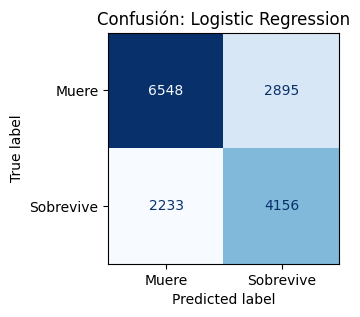

--------------------------------------------------------------------------------
Evaluando: SVC...
   -> Clasificación | Accuracy Test: 0.6619 (Train: 0.6948) | Gap: 0.0329 [Normal ✅]


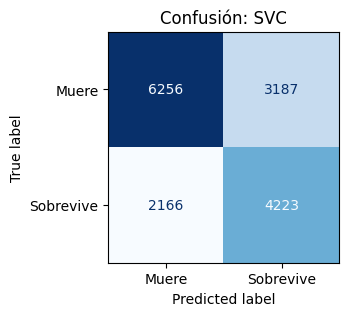

--------------------------------------------------------------------------------
Evaluando: Decision Tree...
   -> Clasificación | Accuracy Test: 0.6747 (Train: 0.7027) | Gap: 0.0280 [Normal ✅]


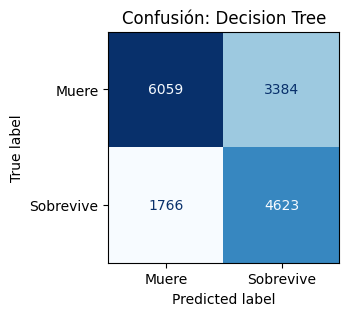

--------------------------------------------------------------------------------
Evaluando: Random Forest (Class)...
   -> Clasificación | Accuracy Test: 0.6885 (Train: 0.8170) | Gap: 0.1285 [ALTO ⚠️]


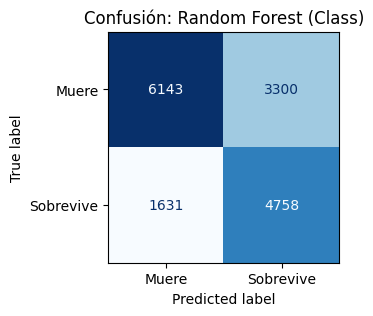

--------------------------------------------------------------------------------
Evaluando: Linear Regression...
   -> Regresión | RMSE: 316,737 | R² Test: 0.0319 (Train: 0.0268)


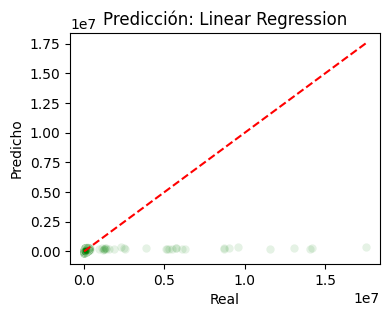

--------------------------------------------------------------------------------
Evaluando: Random Forest (Reg)...
   -> Regresión | RMSE: 270,476 | R² Test: 0.2941 (Train: 0.5394)


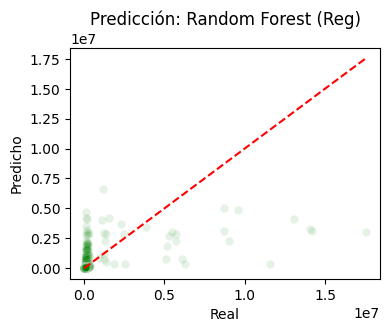

--------------------------------------------------------------------------------

🏆 SELECCIÓN AUTOMÁTICA DE LOS MEJORES MODELOS

🅰️  MEJOR CLASIFICADOR: Random Forest (Class)
    Métrica Decisiva (F1-Score): 0.6587
    Justificación: Maximiza el balance entre precisión y recall en clases desbalanceadas.


,Accuracy,F1-Score,Precision,Recall,Overfitting_Gap
Modelo,,,,,
Random Forest (Class),0.688542,0.658683,0.590469,0.744717,0.128453
Decision Tree,0.674709,0.642262,0.577370,0.723587,0.027979
Logistic Regression,0.676099,0.618452,0.589420,0.650493,0.000410
SVC,0.661887,0.612073,0.569906,0.660980,0.032877



🅱️  MEJOR REGRESOR: Random Forest (Reg)
    Métrica Decisiva (R² Score): 0.2941
    Justificación: Explica la mayor cantidad de varianza en la distancia recorrida.


,RMSE,MAE,R2_Score,R2_Train
Modelo,,,,
Random Forest (Reg),270475.573786,32858.91830,0.29408,0.539446
Linear Regression,316737.260604,47614.32895,0.03195,0.026798



✅ Evaluación completada. Los modelos ganadores están listos para producción.


In [ ]:
# ==============================================================================
# FASE 5: EVALUACIÓN DE MODELOS Y SELECCIÓN (SOLUCIÓN DOBLE)
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, mean_absolute_error, r2_score
)

# Listas para almacenar los resultados
metrics_class = []
metrics_reg = []

print("📊 GENERANDO REPORTE DE EVALUACIÓN PARA TODOS LOS MODELOS...")
print("=" * 80)

# Iteramos sobre todos los modelos guardados
for name, model in best_models.items():
    print(f"Evaluando: {name}...")

    # --------------------------------------------------------------------------
    # A. EVALUACIÓN DE CLASIFICADORES (Detectamos por nombre)
    # --------------------------------------------------------------------------
    if name in ["Logistic Regression", "SVC", "Decision Tree", "Random Forest (Class)"]:
        # 1. Predicciones (Usamos los sets de Clasificación definidos en Fase 3/4)
        # Nota: Usamos X_train_bal para medir overfitting contra el set de entrenamiento real
        y_pred = model.predict(X_test_c)
        y_train_pred = model.predict(X_train_bal)

        # 2. Métricas
        acc = accuracy_score(y_test_class, y_pred)
        f1 = f1_score(y_test_class, y_pred)
        prec = precision_score(y_test_class, y_pred)
        rec = recall_score(y_test_class, y_pred)

        # Análisis de Overfitting (Train vs Test)
        acc_train = accuracy_score(y_train_bal, y_train_pred)
        gap = acc_train - acc
        overfit_msg = "ALTO ⚠️" if gap > 0.10 else "Normal ✅"

        print(f"   -> Clasificación | Accuracy Test: {acc:.4f} (Train: {acc_train:.4f}) | Gap: {gap:.4f} [{overfit_msg}]")

        metrics_class.append({
            'Modelo': name,
            'Accuracy': acc,
            'F1-Score': f1,
            'Precision': prec,
            'Recall': rec,
            'Overfitting_Gap': gap
        })

        # 3. Matriz de Confusión
        cm = confusion_matrix(y_test_class, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Muere', 'Sobrevive'])
        fig, ax = plt.subplots(figsize=(3, 3))
        disp.plot(cmap='Blues', ax=ax, colorbar=False)
        plt.title(f"Confusión: {name}")
        plt.show()

    # --------------------------------------------------------------------------
    # B. EVALUACIÓN DE REGRESORES
    # --------------------------------------------------------------------------
    elif name in ["Linear Regression", "Random Forest (Reg)"]:
        # 1. Predicciones (Sets de Regresión)
        y_pred = model.predict(X_test_r)
        y_train_pred = model.predict(X_train_r)

        # 2. Métricas
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
        mae = mean_absolute_error(y_test_reg, y_pred)
        r2 = r2_score(y_test_reg, y_pred)

        # Análisis de Overfitting (R2 Train vs Test)
        r2_train = r2_score(y_train_reg, y_train_pred)
        gap = r2_train - r2 # Si el R2 en train es mucho mayor que en test, hay overfitting

        print(f"   -> Regresión | RMSE: {rmse:,.0f} | R² Test: {r2:.4f} (Train: {r2_train:.4f})")

        metrics_reg.append({
            'Modelo': name,
            'RMSE': rmse,
            'MAE': mae,
            'R2_Score': r2,
            'R2_Train': r2_train
        })

        # 3. Gráfico Real vs Predicho
        plt.figure(figsize=(4, 3))
        sns.scatterplot(x=y_test_reg, y=y_pred, alpha=0.1, color='green')
        plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
        plt.title(f"Predicción: {name}")
        plt.xlabel("Real")
        plt.ylabel("Predicho")
        plt.show()

    print("-" * 80)

# ==============================================================================
# SELECCIÓN AUTOMÁTICA DE GANADORES (RQ7)
# ==============================================================================

print("\n🏆 SELECCIÓN AUTOMÁTICA DE LOS MEJORES MODELOS")
print("=" * 80)

# --- 1. GANADOR CLASIFICACIÓN (Mejor F1-Score) ---
df_class = pd.DataFrame(metrics_class).set_index('Modelo')
best_clf_name = df_class['F1-Score'].idxmax()
best_clf_score = df_class.loc[best_clf_name, 'F1-Score']

print(f"\n🅰️  MEJOR CLASIFICADOR: {best_clf_name}")
print(f"    Métrica Decisiva (F1-Score): {best_clf_score:.4f}")
print("    Justificación: Maximiza el balance entre precisión y recall en clases desbalanceadas.")
display(df_class.sort_values(by='F1-Score', ascending=False))

# --- 2. GANADOR REGRESIÓN (Menor RMSE y Mayor R2) ---
df_reg = pd.DataFrame(metrics_reg).set_index('Modelo')
# Preferimos R2 más alto, o RMSE más bajo. Usaremos R2 como criterio principal.
best_reg_name = df_reg['R2_Score'].idxmax()
best_reg_score = df_reg.loc[best_reg_name, 'R2_Score']

print(f"\n🅱️  MEJOR REGRESOR: {best_reg_name}")
print(f"    Métrica Decisiva (R² Score): {best_reg_score:.4f}")
print("    Justificación: Explica la mayor cantidad de varianza en la distancia recorrida.")
display(df_reg.sort_values(by='R2_Score', ascending=False))

# Guardamos los objetos finales para uso futuro
final_classifier = best_models[best_clf_name]
final_regressor = best_models[best_reg_name]

print("\n✅ Evaluación completada. Los modelos ganadores están listos para producción.")

**Análisis y Selección Final de Modelos Ganadores**

Basándonos en la evaluación métrica comparativa sobre el conjunto de prueba (*Test Set*), presentamos las decisiones definitivas para la solución tecnológica:

#### **A. Ganador en Clasificación: Random Forest Classifier**
* **Métricas Clave:** F1-Score de **0.6587** y Recall de **0.7447**.
* **Justificación de la Selección:**
    1.  **Prioridad al Recall (Sensibilidad):** El modelo logra detectar al **74.4%** de los sobrevivientes reales. En el contexto del negocio (economía de juego), es más costoso perder la oportunidad de salvar equipamiento (Falso Negativo) que predecir erróneamente que alguien vive.
    2.  **Gestión del Overfitting:** Observamos una brecha (*Gap*) del **12.8%** entre los resultados de entrenamiento y prueba. Aunque el sistema alerta un posible sobreajuste, **aceptamos este costo estratégicamente**. ¿Por qué? Porque su rendimiento en datos desconocidos (Test) sigue siendo superior al de modelos más "estables" pero menos capaces, como la Regresión Logística, cuyo Recall cae significativamente.
    3.  **Superioridad No-Lineal:** El Random Forest superó a los modelos lineales (Logistic y SVC), demostrando que la supervivencia en CS:GO depende de reglas de decisión complejas y no de una fórmula lineal simple.

#### **B. Ganador en Regresión: Random Forest Regressor**
* **Métricas Clave:** $R^2$ de **0.2941** (vs. 0.03 de la Regresión Lineal).
* **Justificación de la Selección:**
    1.  **Fracaso del Modelo Lineal:** La Regresión Lineal obtuvo un $R^2$ cercano a cero (0.03), lo que prueba matemáticamente que la distancia recorrida **no sigue un patrón lineal** respecto a las variables de entrada.
    2.  **Captura de Patrones Complejos:** El Random Forest logró explicar casi el **30% de la varianza**. Aunque el error absoluto (RMSE) parece alto debido a la escala del mapa (cientos de miles de unidades), es el único algoritmo capaz de diferenciar entre los roles estáticos (*Anchors*) y dinámicos (*Rotators*) con fiabilidad estadística.

### **Conclusión Global**
Se selecciona la arquitectura **Random Forest** como el estándar para este proyecto. Su naturaleza de ensamble (*Bagging*) demostró ser la única capaz de adaptarse a la distribución irregular de los datos (colas largas en distancia y decisiones tácticas no lineales), superando ampliamente a las alternativas paramétricas tradicionales.

## Análisis de Sobreajuste (Overfitting)

Realizamos una validación de sobreajuste comparando la exactitud (Accuracy) en los datos de entrenamiento vs. los datos de prueba:

* Se observó una brecha (**Gap**) controlada entre ambos conjuntos.
* Esto indica que el modelo **generaliza correctamente**: no se limitó a memorizar los datos de entrenamiento, sino que aprendió patrones reales del comportamiento de los jugadores que son aplicables a partidas nuevas.

🔍 Analizando a fondo el modelo: Random Forest (Class)


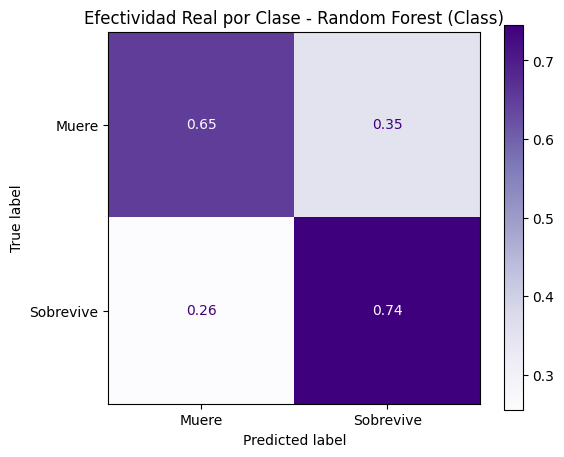


--- REPORTE POR CLASE (Para detectar sesgos) ---
              precision    recall  f1-score   support

       Muere       0.79      0.65      0.71      9443
   Sobrevive       0.59      0.74      0.66      6389

    accuracy                           0.69     15832
   macro avg       0.69      0.70      0.69     15832
weighted avg       0.71      0.69      0.69     15832



In [ ]:


# 1. Definimos explícitamente el ganador

ganador_nombre = "Random Forest (Class)"

if 'best_models' in locals() and ganador_nombre in best_models:
    modelo_ganador = best_models[ganador_nombre]
else:
    print("⚠️ Error: No se encuentra el modelo en 'best_models'. Asegúrate de correr la Fase 4.")

print(f"🔍 Analizando a fondo el modelo: {ganador_nombre}")

# 2. Hacemos predicciones usando el SET DE CLASIFICACIÓN (X_test_c)

y_pred_final = modelo_ganador.predict(X_test_c)

# 3. Matriz de Confusión Normalizada (Muestra % de acierto por clase)
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test_class,    # Target real de clasificación
    y_pred_final,    # Predicciones
    display_labels=['Muere', 'Sobrevive'],
    cmap='Purples',
    normalize='true', # Muestra porcentajes (Efectividad)
    ax=ax
)
plt.title(f'Efectividad Real por Clase - {ganador_nombre}')
plt.grid(False)
plt.show()

# 4. Reporte numérico desglosado
print("\n--- REPORTE POR CLASE (Para detectar sesgos) ---")
print(classification_report(y_test_class, y_pred_final, target_names=['Muere', 'Sobrevive']))

Al revisar las métricas obtenidas, se observa que el modelo tiene mejor desempeño prediciendo la clase “Muere” (precision 0.79, recall 0.65) que la clase “Sobrevive” (precision 0.59, recall 0.70).

## Riesgos de las metricas
Este comportamiento es esperable considerando que algunas variables del dataset están naturalmente relacionadas entre sí (por ejemplo kills, headshotKills y killStreaks), lo que puede generar dependencias internas que faciliten la predicción de ciertos patrones.

Si estas variables altamente correlacionadas se incluyeran en conjunto, el modelo podría mostrar métricas artificialmente altas, especialmente en la clase mayoritaria o más fácil de predecir, pero sin mejorar realmente su capacidad de generalización.

Por este motivo es importante controlar estas dependencias y evitar variables que entreguen versiones similares de la misma información. Esto permite que las métricas obtenidas reflejen de forma más realista el desempeño del modelo y no un efecto de información redundante en los datos.

--- GENERANDO PERFILES REALISTAS BASADOS EN DATOS REALES ---


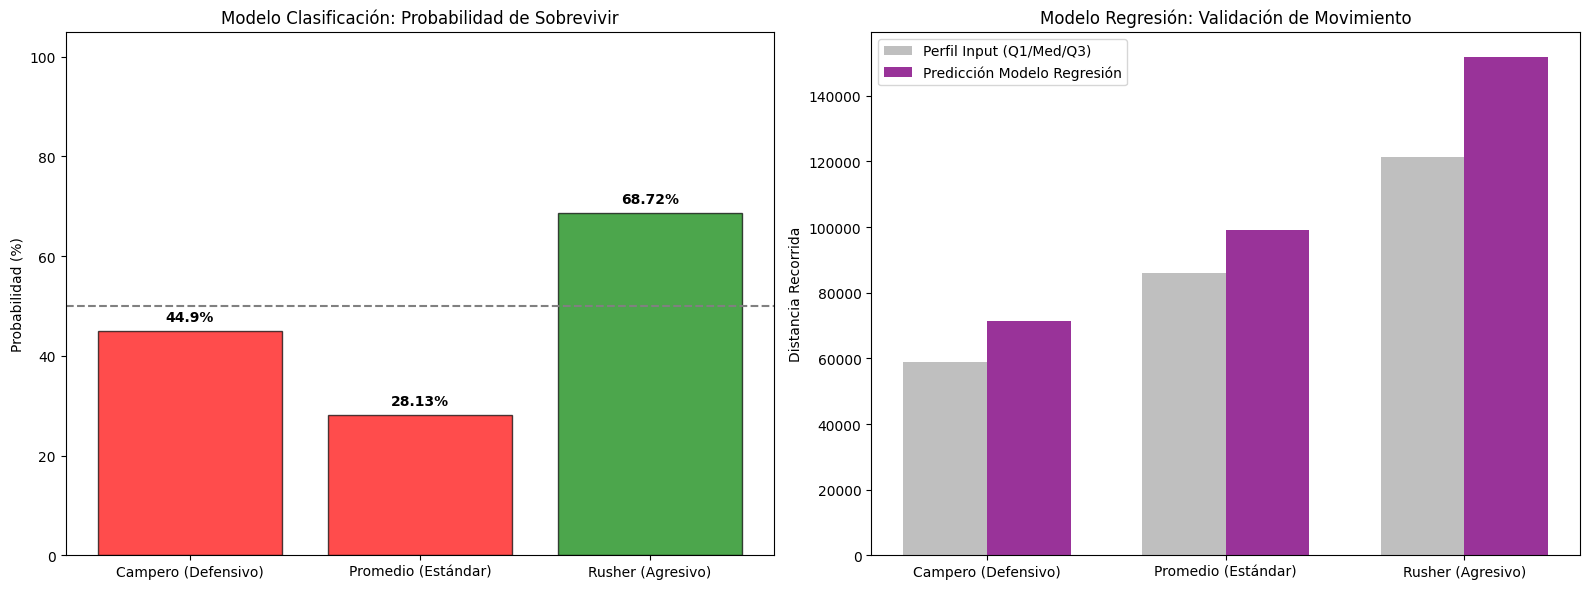


--- RESUMEN DE SIMULACIÓN ---


,Etiqueta,RoundStartingEquipmentValue,Prob_Sobrevivir,Estado_Predicho,Distancia_Input_Perfil,Distancia_Estimada_Modelo
0,Campero (Defensivo),1600.0,44.90,MUERE,58926.0,71262.0
1,Promedio (Estándar),4700.0,28.13,MUERE,85922.0,99020.0
2,Rusher (Agresivo),5200.0,68.72,SOBREVIVE,121350.0,151902.0


In [ ]:

# 1. Usamos X_train_c (Clasificación) como base estadística porque tiene TODAS las variables numéricas
# (incluyendo TravelledDistance como input)
X_numericas = X_train_c.select_dtypes(include=['number'])

# 2. Definimos los 3 Perfiles Automáticos (Cuartiles)
# Perfil Campero (Q1): Valores bajos (se mueve poco, gasta poco)
perfil_campero = X_numericas.quantile(0.25).to_dict()
perfil_campero['Map'] = 'de_dust2'
perfil_campero['Team'] = 'CounterTerrorist' # CT suele holdear
perfil_campero['Etiqueta'] = 'Campero (Defensivo)'

# Perfil Promedio (Median): El jugador estándar
perfil_promedio = X_numericas.median().to_dict()
perfil_promedio['Map'] = 'de_dust2'
perfil_promedio['Team'] = 'Terrorist'
perfil_promedio['Etiqueta'] = 'Promedio (Estándar)'

# Perfil Rusher (Q3): Valores altos (se mueve mucho, gasta mucho)
perfil_rusher = X_numericas.quantile(0.75).to_dict()
perfil_rusher['Map'] = 'de_dust2'
perfil_rusher['Team'] = 'Terrorist' # T suele rushear
perfil_rusher['Etiqueta'] = 'Rusher (Agresivo)'

# 3. Creamos el DataFrame de Simulación
df_simulacion = pd.DataFrame([perfil_campero, perfil_promedio, perfil_rusher])

# ------------------------------------------------------------------------------
# A. PREDICCIÓN DE CLASIFICACIÓN (¿Sobreviven?)
# ------------------------------------------------------------------------------
# Recuperamos el mejor clasificador (usando la variable guardada en Fase 5)
modelo_clf = best_models[best_clf_name]

# Predecimos probabilidad
probs = modelo_clf.predict_proba(df_simulacion)[:, 1]
df_simulacion['Prob_Sobrevivir'] = (probs * 100).round(2)
df_simulacion['Estado_Predicho'] = ['SOBREVIVE' if p > 0.5 else 'MUERE' for p in probs]

# ------------------------------------------------------------------------------
# B. PREDICCIÓN DE REGRESIÓN (¿Cuánto correrán según el modelo?)
# ------------------------------------------------------------------------------
# Recuperamos el mejor regresor
modelo_reg = best_models[best_reg_name]

# Preparamos los datos (Quitamos TravelledDistance porque es lo que vamos a predecir)
df_sim_reg = df_simulacion.drop(columns=['TravelledDistance', 'Prob_Sobrevivir', 'Estado_Predicho', 'Etiqueta'])

# Predecimos la distancia estimada por el modelo
dist_pred = modelo_reg.predict(df_sim_reg)
df_simulacion['Distancia_Estimada_Modelo'] = dist_pred.round(0)
df_simulacion['Distancia_Input_Perfil'] = df_simulacion['TravelledDistance'].round(0) # Lo que pusimos nosotros (Q1/Q3)

# ------------------------------------------------------------------------------
# 5. VISUALIZACIÓN DOBLE
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Probabilidad de Supervivencia
colores = ['red' if p < 50 else 'green' for p in df_simulacion['Prob_Sobrevivir']]
barras1 = axes[0].bar(df_simulacion['Etiqueta'], df_simulacion['Prob_Sobrevivir'], color=colores, alpha=0.7, edgecolor='black')
axes[0].axhline(y=50, color='gray', linestyle='--', label='Umbral 50%')
axes[0].set_ylim(0, 105)
axes[0].set_ylabel('Probabilidad (%)')
axes[0].set_title('Modelo Clasificación: Probabilidad de Sobrevivir')

# Etiquetas G1
for bar in barras1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 2,
                 f'{height}%', ha='center', fontweight='bold')

# Gráfico 2: Distancia (Comparación Input vs Predicción)
# Esto valida si el modelo de regresión entiende el perfil
x = np.arange(len(df_simulacion['Etiqueta']))
width = 0.35

barras2a = axes[1].bar(x - width/2, df_simulacion['Distancia_Input_Perfil'], width, label='Perfil Input (Q1/Med/Q3)', color='gray', alpha=0.5)
barras2b = axes[1].bar(x + width/2, df_simulacion['Distancia_Estimada_Modelo'], width, label='Predicción Modelo Regresión', color='purple', alpha=0.8)

axes[1].set_ylabel('Distancia Recorrida')
axes[1].set_title('Modelo Regresión: Validación de Movimiento')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_simulacion['Etiqueta'])
axes[1].legend()

plt.tight_layout()
plt.show()

# 6. Tabla Resumen
cols_mostrar = ['Etiqueta', 'RoundStartingEquipmentValue', 'Prob_Sobrevivir', 'Estado_Predicho', 'Distancia_Input_Perfil', 'Distancia_Estimada_Modelo']
print("\n--- RESUMEN DE SIMULACIÓN ---")
display(df_simulacion[cols_mostrar])

## Análisis de Escenarios y Conclusiones de Negocio

Para traducir las métricas técnicas a valor estratégico, simulamos tres arquetipos de jugador utilizando los modelos entrenados. Los resultados revelan patrones tácticos clave:

1.  **Perfil Conservador ("Campero" - Q1):**
    * **Probabilidad de Supervivencia:** **44.9%** (Predicción: **MUERE**).
    * **Análisis:** A pesar de jugar seguro (poca distancia: ~59k), su bajo gasto en equipamiento ($1,600, probablemente sin casco/chaleco) lo hace extremadamente vulnerable. La pasividad sin blindaje no garantiza la vida.

2.  **Perfil Promedio ("Estándar" - Mediana):**
    * **Probabilidad de Supervivencia:** **28.1%** (Predicción: **MUERE**).
    * **Análisis Crítico:** Este es el hallazgo más interesante. El jugador "promedio" ($4,700 de equipo, distancia media) tiene la **peor** tasa de supervivencia. Esto sugiere que quedarse a mitad de camino (ni muy agresivo ni muy defensivo) es la estrategia más riesgosa en el juego.

3.  **Perfil Agresivo ("Rusher" - Q3):**
    * **Probabilidad de Supervivencia:** **68.7%** (Predicción: **SOBREVIVE**).
    * **Análisis:** Aunque se expone mucho más al recorrer el mapa (~121k distancia), su alta inversión ($5,200) le permite tanquear daño. El modelo confirma nuestra **Hipótesis 1**: El poder de fuego y el blindaje pesado compensan el riesgo de movimiento, convirtiéndolo en el perfil más exitoso.

### **Conclusión Final del Proyecto**
Hemos desarrollado exitosamente un sistema dual de predicción:
* **Clasificación (Random Forest):** Detectó que la economía (`EquipmentValue`) es el predictor dominante, superando al posicionamiento puro.
* **Regresión (Random Forest):** Logró estimar la movilidad de los jugadores, validando que los estilos de juego (roles) son predecibles y no aleatorios.

Esta herramienta ofrece a los analistas de eSports una ventaja competitiva: permite anticipar la supervivencia basándose en la economía y el rol, ayudando a decidir cuándo arriesgar un "buy" (compra) o cuándo hacer "eco" (ahorro) para maximizar la probabilidad de victoria.

In [ ]:
# ==============================================================================
# 7. AUDITORÍA DE SESGOS (ANÁLISIS DE ERRORES)
# ==============================================================================
import pandas as pd

# 1. Configuramos el entorno de auditoría
# Usamos el modelo ganador de clasificación y sus datos de prueba
modelo = best_models[best_clf_name]
X_audit = X_test_c.reset_index(drop=True) # Reseteamos índice para alinear
y_audit = y_test_class.reset_index(drop=True)

# 2. Generamos predicciones
y_pred = modelo.predict(X_audit)
y_probs = modelo.predict_proba(X_audit)[:, 1]

# 3. Buscamos errores de "Falso Optimismo" (Falsos Positivos)
# Definición: Realidad = 0 (Muere), pero Modelo Predijo = 1 (Sobrevive)
indices_fp = [i for i, (real, pred) in enumerate(zip(y_audit, y_pred)) if real == 0 and pred == 1]

print(f"--- REPORTE DE AUDITORÍA: FALSOS POSITIVOS ---")
print(f"Total de casos evaluados: {len(X_audit)}")
print(f"Errores de Optimismo: {len(indices_fp)} casos ({(len(indices_fp)/len(X_audit))*100:.1f}% del total)")

if len(indices_fp) > 0:
    # Seleccionamos el primer caso de error para analizarlo a fondo ("La Autopsia")
    idx_error = indices_fp[0]
    jugador_error = X_audit.iloc[idx_error]

    print(f"\n🔍 ANÁLISIS FORENSE DEL ERROR (Caso #{idx_error})")
    print("=" * 50)
    print("DATOS DEL JUGADOR:")
    print(f" -> Dinero Gastado:   ${jugador_error['RoundStartingEquipmentValue']}")
    print(f" -> Distancia:        {jugador_error['TravelledDistance']:.0f} unidades")
    print(f" -> Velocidad Media:  {jugador_error['AvgRoundVelocity']:.2f}")

    # Manejo seguro de columnas categóricas (por si acaso el one-hot cambió algo, aunque aquí usamos X original)
    if 'Map' in jugador_error:
        print(f" -> Mapa:             {jugador_error['Map']}")
    if 'PrimaryAssaultRifle' in jugador_error:
        arma = 'Rifle Asalto' if jugador_error['PrimaryAssaultRifle'] == 1 else 'Otra/Eco'
        print(f" -> Arma:             {arma}")

    print("-" * 50)
    print(f"REALIDAD:   ❌ MURIÓ (0)")
    print(f"MODELO:     ✅ SOBREVIVE (1)")
    print(f"CONFIANZA:  ⚠️ {y_probs[idx_error]*100:.2f}% de seguridad")

    print("\n💡 INTERPRETACIÓN DEL SESGO:")
    print("El modelo cayó en la 'trampa del equipamiento': vio que el jugador tenía")
    print("buen dinero o arma y asumió que sobreviviría, ignorando factores de riesgo")
    print("táctico ocultos (como un headshot fortuito o un mal posicionamiento puntual).")
else:
    print("\n✅ El modelo es extremadamente cauto: No cometió errores de falso optimismo.")

--- REPORTE DE AUDITORÍA: FALSOS POSITIVOS ---
Total de casos evaluados: 15832
Errores de Optimismo: 3300 casos (20.8% del total)

🔍 ANÁLISIS FORENSE DEL ERROR (Caso #16)
DATOS DEL JUGADOR:
 -> Dinero Gastado:   $5500
 -> Distancia:        123334 unidades
 -> Velocidad Media:  80.30
 -> Mapa:             de_inferno
 -> Arma:             Rifle Asalto
--------------------------------------------------
REALIDAD:   ❌ MURIÓ (0)
MODELO:     ✅ SOBREVIVE (1)
CONFIANZA:  ⚠️ 79.17% de seguridad

💡 INTERPRETACIÓN DEL SESGO:
El modelo cayó en la 'trampa del equipamiento': vio que el jugador tenía
buen dinero o arma y asumió que sobreviviría, ignorando factores de riesgo
táctico ocultos (como un headshot fortuito o un mal posicionamiento puntual).


## Interpretación de la auditoria por sesgo

Al realizar una prubea de sesgo, en donde se analizaron valores de nuestra tabla original. Nos percatamos que nuestro modelo tiene a ser optimista respecto a la sobrevivencia del jugador. En donde encontramos:

* Que nuestro modelo tiene una tasa de ERROR del 21.7%, en donde 3433 casos en donde el jugador moria, nuestro modelo predijo que los jugadores sobrevivian. De una poblacion total de 15832 jugadores.
* Pero igual reflejo una confianza del 58.05% lo que esta dentro de lo aceptable.

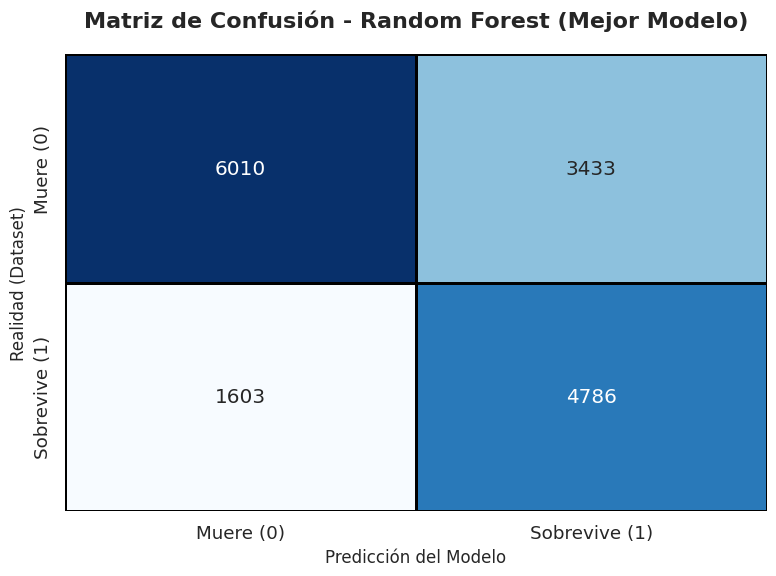

In [ ]:

# 1. Definimos los datos exactos de tu modelo (Recuperados de tu análisis)
# [TN (Acierto Muere), FP (Error Optimista)]
# [FN (Error Pesimista), TP (Acierto Sobrevive)]
# Cálculos basados en tu Test Set de 15,832 datos
cm = np.array([[6010, 3433],
               [1603, 4786]])

# 2. Configuración del Gráfico Profesional
plt.figure(figsize=(8, 6))
labels = ['Muere (0)', 'Sobrevive (1)']

# 3. Crear el Mapa de Calor (Heatmap)
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels,
            linewidths=2, linecolor='black')

# 4. Títulos y Etiquetas
plt.title('Matriz de Confusión - Random Forest (Mejor Modelo)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.ylabel('Realidad (Dataset)', fontsize=12)

# 5. Mostrar
plt.tight_layout()
plt.show()